# Sinton data analysis

- Mattias Juhl.

Here we just open the raw data from sinton files and do some calculations to get the finial lifeitme.

We can do it for one file or for a batch of files

This page is setout in the following manner:

1. Importing stuff to make this work
2. An example of a loading a single file
3. An example of a batch file loading


Quick notes:

* nxc: number of excess carriers
* LTC: lifetime class


In [4]:
# python magic
import PV_analysis as pva
import numpy as np
import matplotlib.pyplot as plt
import semiconductor as sem
import scipy.constants as C
import os
import sys
from glob import glob
import workflow.tools.Sinton as sinton

%matplotlib notebook

def iVoc_at_generation(LTC, ref):
    '''
    Determines the excess carrier density at a specific generation rate
        
    inputs:
        LTC: (class)
            lifetime time class
        constant: (str, default = 'nxc)
            The value to be comared 
            options excess carrier density, 'nxc' or generation rate 'generation.
    '''
    
    nxc = LTC.sample.iVoc[np.argmin(abs(LTC.generation*LTC.sample.thickness-ref))]
    
    return nxc   
   
def nxc_at_generation(LTC, ref):
    '''
    Determines the excess carrier density at a specific generation rate
        
    inputs:
        LTC: (class)
            lifetime time class
        constant: (str, default = 'nxc)
            The value to be comared 
            options excess carrier density, 'nxc' or generation rate 'generation.
    '''
    
    nxc = LTC.sample.nxc[np.argmin(abs(LTC.generation*LTC.sample.thickness-ref))]
    
    return nxc    

def get_lifetime(LTC, nxc_ref):
    '''
    Determines the lifetime at a specific generation rate
    or lifetime
    
    inputs:
        LTC: (class)
            lifetime time class
        nxc_ref: (float)
            The excess carrier densit at which the lifetime is to be found
    '''
    
    tau = LTC.tau[np.argmin(abs(LTC.sample.nxc-nxc_ref))]
    
    return tau



/home/mattias/.local/lib/python3.5/site-packages/semiconductor/electrical/mobilitymodels.py:419: RuntimeWarning: divide by zero encountered in true_divide
  Nd))**2.)


lifetime at 1e15: 9.45e-05 s


<IPython.core.display.Javascript object>


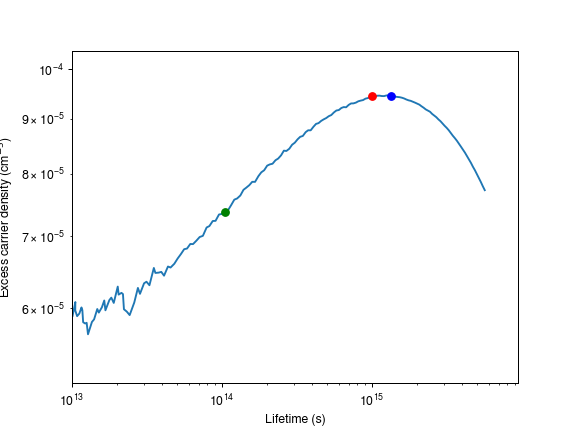

<IPython.core.display.Javascript object>


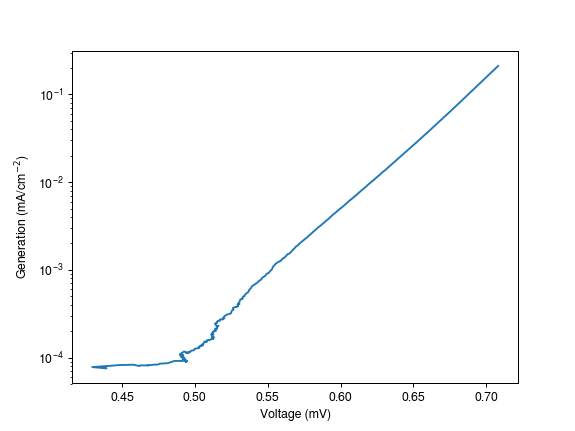

Text(0.5,0,'Voltage (mV)')

In [17]:

# define file
fname = 'Sample8.ltr'

# define lifetime class
LTC = pva.lifetime.QSSPC.IO.load_lifetime_sinton(fname)

# give some sample properties not provided in the sinton file
LTC.sample.dopant_type = 'p'
LTC.sample.doping = 1e16
LTC.sample.thickness = 0.018

# re calculate the lifetime
LTC.cal_lifetime()
tau_1e15  = get_lifetime(LTC, 1e15)

nxc_1sun =  nxc_at_generation(LTC, 2.5e17)
tau_1sun  = get_lifetime(LTC, nxc_1sun)

nxc_0p1sun =  nxc_at_generation(LTC, 2.5e16)
tau_0p1sun  = get_lifetime(LTC, nxc_0p1sun)

# print the value out
print('lifetime at 1e15: {0:.2e} s'.format(tau_1e15))

# now we do some plotting of the data
plt.figure('lifetime_single')
plt.plot(LTC.sample.nxc, LTC.tau)
plt.plot(1e15, tau_1e15,'ro')
plt.plot(nxc_1sun, tau_1sun,'bo')
plt.plot(nxc_0p1sun, tau_0p1sun,'go')
plt.loglog()

plt.xlim(left=1e13)

# some magic y scale for nice plotting of one sample
ymin = np.amin(LTC.tau[LTC.sample.nxc>1e13])*0.9
ymax = np.amax(LTC.tau[LTC.sample.nxc>1e13])*1.1
plt.ylim(bottom=ymin, top=ymax)
plt.xlabel('Lifetime (s)')
plt.ylabel('Excess carrier density (cm$^{-3}$)')


plt.figure('Suns iVoc single')
plt.plot(LTC.iVoc,LTC.generation*LTC.sample.thickness*C.e)
plt.semilogy()

plt.ylabel('Generation (mA/cm$^{-2}$)')
plt.xlabel('Voltage (mV)')


# batch lifetime plotting

For batch files you can use the following little fella

/home/mattias/.local/lib/python3.5/site-packages/semiconductor/electrical/mobilitymodels.py:419: RuntimeWarning: divide by zero encountered in true_divide
  Nd))**2.)


<IPython.core.display.Javascript object>


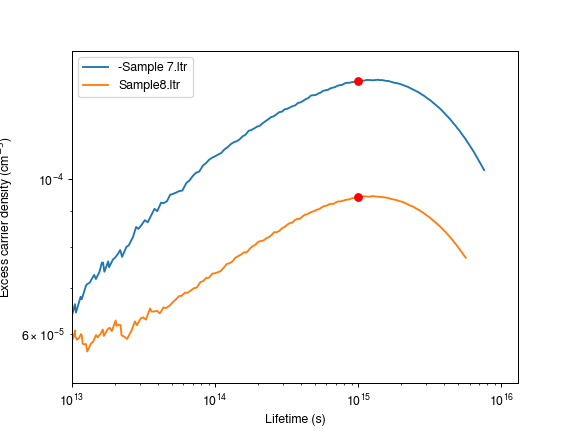

lifetime at 1e15 for -Sample 7.ltr: 1.38e-04 s


<IPython.core.display.Javascript object>


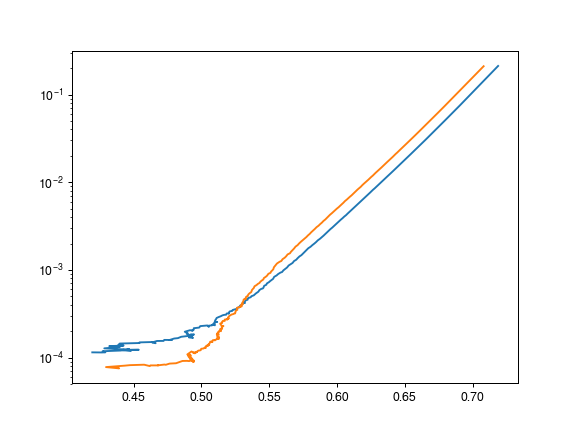

/home/mattias/.local/lib/python3.5/site-packages/PV_analysis/lifetime/core.py:185: RuntimeWarning: divide by zero encountered in log
  (self.sample.nxc + self.sample.doping) / self.sample.ni_eff**2)


lifetime at 1e15 for Sample8.ltr: 9.45e-05 s


<IPython.core.display.Javascript object>


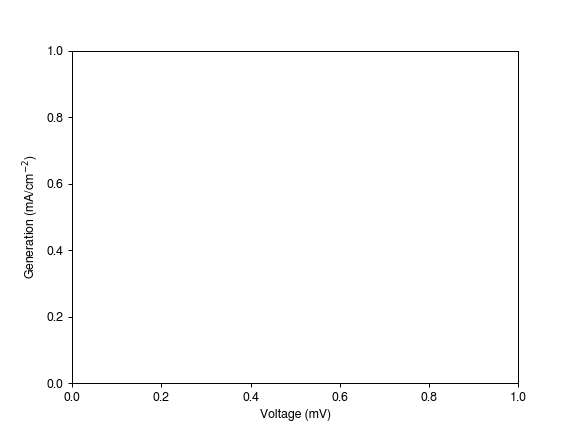

In [16]:
from glob import glob
# define a folder:

folder = r'c:\MagicFolder'
folder = ''

ymin = 1
ymax = 0

for fname in glob(os.path.join(folder,'*.ltr')):

    # define lifetime class
    LTC = pva.lifetime.QSSPC.IO.load_lifetime_sinton(fname)

    # give some sample properties not provided in the sinton file
    LTC.sample.dopant_type = 'p'
    LTC.sample.doping = 1e16
    LTC.sample.thickness = 0.018

    # re calculate the lifetime
    LTC.cal_lifetime()
    
    # extract tau at 1e15
    tau_1e15  = get_lifetime(LTC, 1e15)
    
    
    # make some plots
    plt.figure('lifetime')
    plt.plot(LTC.sample.nxc, LTC.tau, label=fname.split(os.sep)[-1])
    plt.plot(1e15, tau_1e15,'ro')
        
    plt.loglog()

    ymin = np.amin([ymin, np.amin(LTC.tau[LTC.sample.nxc>1e13])])
    ymax = np.amax([ymax, np.amax(LTC.tau[LTC.sample.nxc>1e13])])
    
    print('lifetime at 1e15 for {1}: {0:.2e} s'.format(tau_1e15, fname.split(os.sep)[-1]))
    
    plt.xlabel('Lifetime (s)')
    plt.ylabel('Excess carrier density (cm$^{-3}$)')


    plt.figure('iVoc')
    plt.plot(LTC.iVoc,LTC.generation*LTC.sample.thickness*C.e)
    plt.semilogy()

plt.figure('Suns iVoc')
plt.ylabel('Generation (mA/cm$^{-2}$)')
plt.xlabel('Voltage (mV)')
    
    
plt.figure('lifetime')
plt.xlim(left=1e13)
plt.ylim(bottom=ymin*0.9, top=ymax*1.1)
plt.legend(loc=0)
plt.show()